In [1]:
import os
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
from scipy.stats.stats import pearsonr

In [2]:
def get_distance_wall(simulation):

    # Transform Unity coordinates and rescale it.
    psx = (simulation['posx'] - 1000) /7
    psz = (simulation['posz'] - 1000) /7

    # Calculate the minimum distance to all 4 walls and save it
    mindist = np.zeros(simulation['posx'].shape[1])
    #mindist = np.zeros(simulation['posx'].shape[0])
    aa = abs(  1 - psx)
    bb = abs(- 1 - psx)
    cc = abs(  1 - psz)
    dd = abs(- 1 - psz)
    for t in range(simulation['posx'].shape[1]):
        mindist[t] = min(aa[0, t], bb[0, t], cc[0, t], dd[0, t])
    return mindist

In [3]:
def exclude_input_nodes(simulation, measure):
    # exclude input and ouput nodes
    input_output_nodes = [20, 20 + 33, 9, 9 + 33, 21, 21 + 33, 22, 22 + 33]
    bool_m = np.ones(66, dtype=bool)
    bool_m[input_output_nodes] = False
    return simulation[measure][:, bool_m]

In [4]:
def get_behavioural_data(testn, path, behaviour):
    if type(testn)== int:
        matfile = os.path.join(path, 'results_testn_%d' %(testn))
    else:
        matfile = os.path.join(path, 'results_testn_%s' %(testn))
    simulation = scipy.io.loadmat(matfile)

    # chop initial time points necessary for the statibilisation of the model
    simulation['ws'] = simulation['ws'][5000:, :, 0]
    simulation['hs'] = simulation['hs'][5000:, :, 0]
    simulation['xs'] = simulation['xs'][5000:, :]
    simulation['posx'] = simulation['posx']
    simulation['posz'] = simulation['posz']

    results = {}

    # Exclude the input and Output nodes for analysis
    hs = exclude_input_nodes(simulation, 'hs')
    xs = exclude_input_nodes(simulation, 'xs')
    ws = exclude_input_nodes(simulation, 'ws')
    # Get mean activity over all nodes
    results['mean_activity_over_time'] = np.mean(simulation['xs'], axis=1)
    if behaviour:
        # get distance from the wall
        tot_min_dist = get_distance_wall(simulation)
        # get which wall the avatar was closer to
        results['mean_dist'] = np.mean(tot_min_dist)

        results['correlation_hs'] = np.zeros(58)
        results['correlation_xs'] = np.zeros(58)
        for n in range(58):
            results['correlation_hs'][n] = pearsonr(tot_min_dist, hs[:, n])[0]
            results['correlation_xs'][n] = pearsonr(tot_min_dist, xs[:, n])[0]
        results['mean_correlation_hs'] = np.mean(results['correlation_hs'])
        results['mean_correlation_xs'] = np.mean(results['correlation_xs'])
        return ws, hs, xs, tot_min_dist, results['correlation_hs'], results['mean_correlation_hs'], \
               results['correlation_xs'], results['mean_correlation_xs']
    else:
        return ws, hs, xs

In [5]:
path = '/home/jdafflon/code/Avatar/Python/Output/simulation/with_behaviour/behavioural_analysis/'

# No Behaviuor

In [6]:
import pdb
noDMN = '%02d'%01
DMN = '%02d'%00

ws00, hs00, xs00 = get_behavioural_data(noDMN, path, False)
ws01, hs01, xs01 = get_behavioural_data(DMN, path, False)

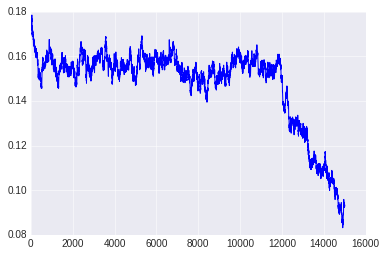

In [8]:
plt.plot(np.mean(xs00, axis=1))
#plt.plot(np.mean(xs01, axis=1))

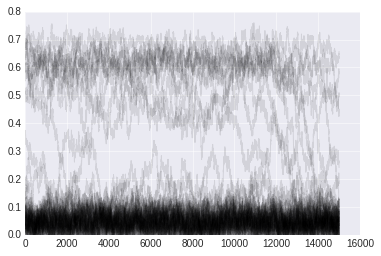

In [10]:
plt.plot(xs01, 'k', alpha=0.1);

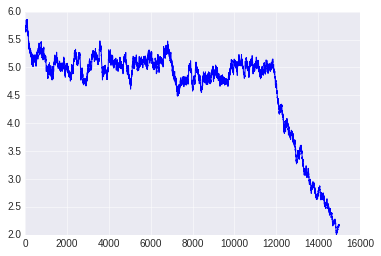

In [36]:
plt.plot(np.mean(hs00 * 1000, axis=1))
#plt.plot(np.mean(hs01, axis=1))

# With DMN

In [12]:
## obtain the correlation

In [7]:
ws0, hs0, xs0, tot_mindist0, correlation0_hs, mean_correlation0_hs, \
correlation0_xs, mean_correlation0_xs = get_behavioural_data(0, path, True)
ws1, hs1, xs1, tot_mindist1, correlation1_hs, mean_correlation1_hs, \
correlation1_xs, mean_correlation1_xs = get_behavioural_data(1, path, True,)
ws2, hs2, xs2, tot_mindist2, correlation2_hs, mean_correlation2_hs, \
correlation2_xs, mean_correlation2_xs = get_behavioural_data(2, path, True,)
ws3, hs3, xs3, tot_mindist3, correlation3_hs, mean_correlation3_hs, \
correlation3_xs, mean_correlation3_xs = get_behavioural_data(3, path, True)

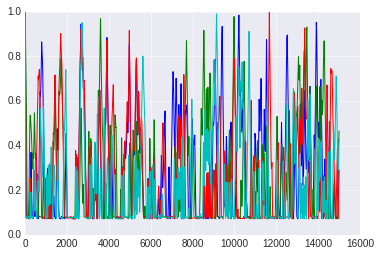

In [8]:
plt.plot(tot_mindist0)
plt.plot(tot_mindist1)
plt.plot(tot_mindist2)
plt.plot(tot_mindist3)

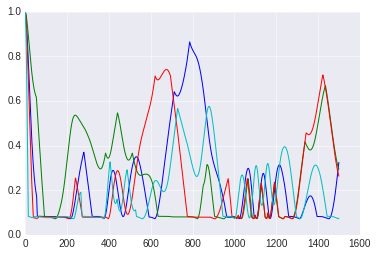

In [170]:
plt.plot(tot_mindist0[:1500])
plt.plot(tot_mindist1[:1500])
plt.plot(tot_mindist2[:1500])
plt.plot(tot_mindist3[:1500])

### hs - Firing Rate

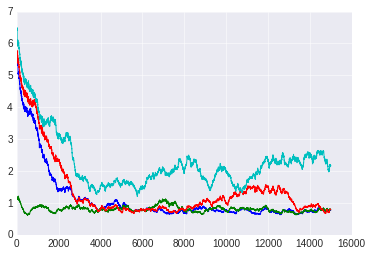

In [171]:
plt.plot(np.mean(hs0 * 1000, axis=1))
plt.plot(np.mean(hs1 * 1000, axis=1))
plt.plot(np.mean(hs2 * 1000, axis=1))
plt.plot(np.mean(hs3 * 1000, axis=1))

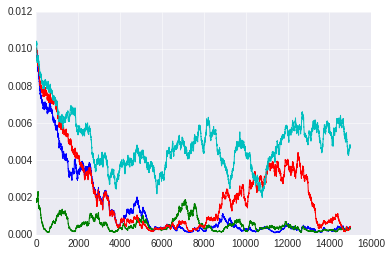

In [172]:
plt.plot(np.std(hs0, axis=1))
plt.plot(np.std(hs1, axis=1))
plt.plot(np.std(hs2, axis=1))
plt.plot(np.std(hs3, axis=1))

# ws

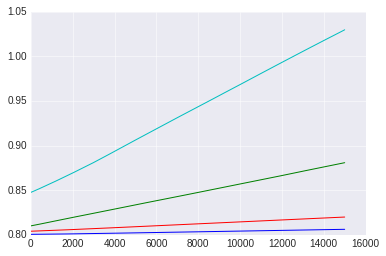

In [9]:
plt.plot(np.mean(ws0, axis=1))
plt.plot(np.mean(ws1, axis=1))
plt.plot(np.mean(ws2, axis=1))
plt.plot(np.mean(ws3, axis=1))

In [11]:
print (np.mean(np.mean(ws3, axis=1)), np.std(np.mean(ws3, axis=1)))

(0.93736879168760523, 0.053387452100558723)


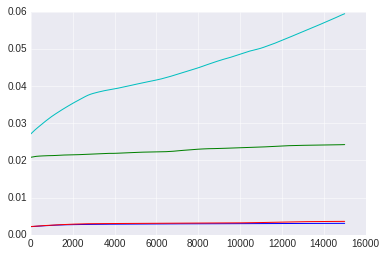

In [40]:
plt.plot(np.std(ws0, axis=1))
plt.plot(np.std(ws1, axis=1))
plt.plot(np.std(ws2, axis=1))
plt.plot(np.std(ws3, axis=1))

# xs

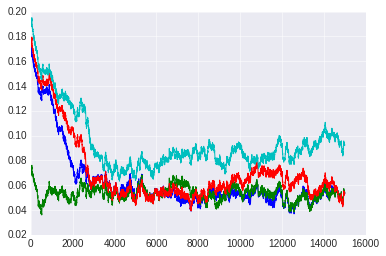

In [173]:
plt.plot(np.mean(xs0, axis=1))
plt.plot(np.mean(xs1, axis=1))
plt.plot(np.mean(xs2, axis=1))
plt.plot(np.mean(xs3, axis=1))

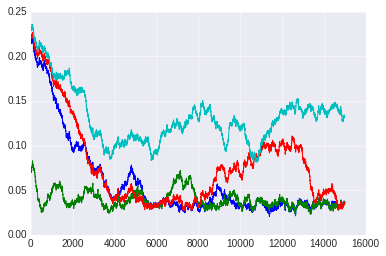

In [174]:
plt.plot(np.std(xs0, axis=1))
plt.plot(np.std(xs1, axis=1))
plt.plot(np.std(xs2, axis=1))
plt.plot(np.std(xs3, axis=1))

# Correlations

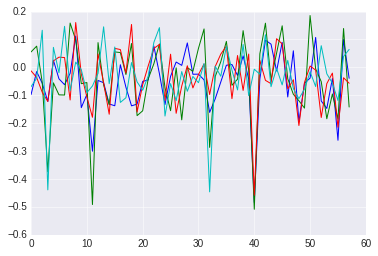

In [175]:
plt.plot(correlation0_hs)
plt.plot(correlation1_hs)
plt.plot(correlation2_hs)
plt.plot(correlation3_hs)

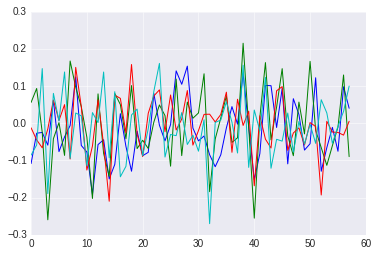

In [176]:
plt.plot(correlation0_xs)
plt.plot(correlation1_xs)
plt.plot(correlation2_xs)
plt.plot(correlation3_xs)

In [177]:
from collections import Counter
from pandas import Series
w0 =[round(i, 2) for i in tot_mindist0]
s0 = Series(Counter(w0))
w1 =[round(i, 2) for i in tot_mindist1]
s1 = Series(Counter(w1))
w2 =[round(i, 2) for i in tot_mindist2]
s2 = Series(Counter(w2))
w3 =[round(i, 2) for i in tot_mindist3]
s3 = Series(Counter(w3))

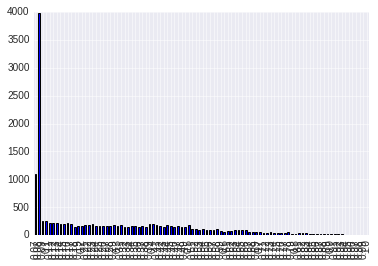

In [178]:
s0.plot(kind='bar')

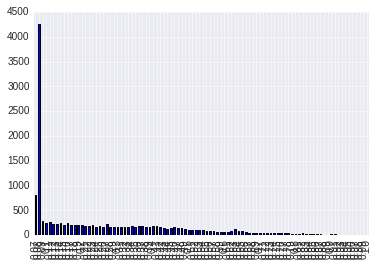

In [179]:
s1.plot(kind='bar')

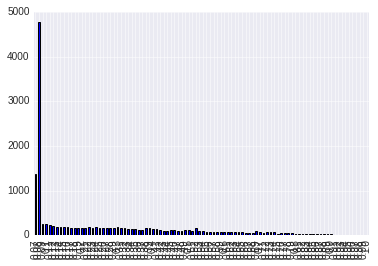

In [180]:
s2.plot(kind='bar')

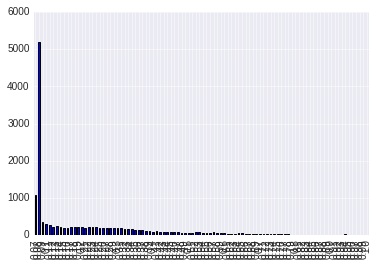

In [181]:
s3.plot(kind='bar')

## Without DMN

In [12]:
path = '/home/jdafflon/code/Avatar/Python/Output/simulation/with_behaviour/behavioural_analysis/no_DMN'
ws0, hs0, xs0, tot_mindist0, correlation0_hs, mean_correlation0_hs, \
correlation0_xs, mean_correlation0_xs = get_behavioural_data(0, path, True)
ws1, hs1, xs1, tot_mindist1, correlation1_hs, mean_correlation1_hs, \
correlation1_xs, mean_correlation1_xs = get_behavioural_data(1, path, True)
ws2, hs2, xs2, tot_mindist2, correlation2_hs, mean_correlation2_hs, \
correlation2_xs, mean_correlation2_xs = get_behavioural_data(2, path, True)
ws3, hs3, xs3, tot_mindist3, correlation3_hs, mean_correlation3_hs, \
correlation3_xs, mean_correlation3_xs = get_behavioural_data(3, path, True)

### Distance Wall

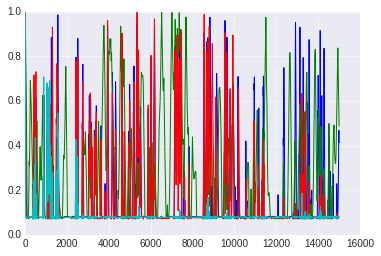

In [13]:
plt.plot(tot_mindist0)
plt.plot(tot_mindist1)
plt.plot(tot_mindist2)
plt.plot(tot_mindist3)

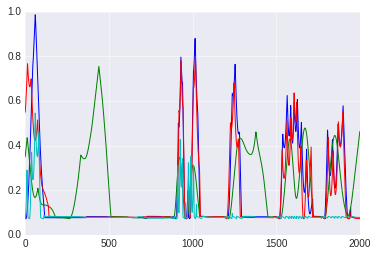

In [16]:
plt.plot(tot_mindist0[1500:3500])
plt.plot(tot_mindist1[1500:3500])
plt.plot(tot_mindist2[1500:3500])
plt.plot(tot_mindist3[1500:3500])

### ws

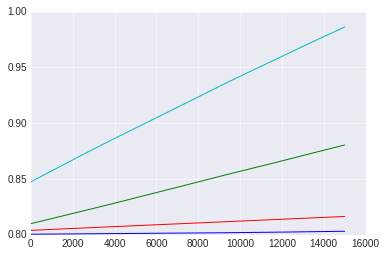

In [126]:
plt.plot(np.mean(ws0, axis=1))
plt.plot(np.mean(ws1, axis=1))
plt.plot(np.mean(ws2, axis=1))
plt.plot(np.mean(ws3, axis=1))

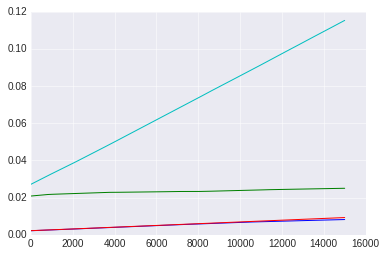

In [127]:
plt.plot(np.std(ws0, axis=1))
plt.plot(np.std(ws1, axis=1))
plt.plot(np.std(ws2, axis=1))
plt.plot(np.std(ws3, axis=1))

### hs - Firing Rate

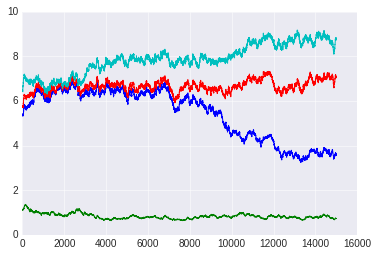

In [135]:
plt.plot(np.mean(hs0 * 1000, axis=1))
plt.plot(np.mean(hs1 * 1000, axis=1))
plt.plot(np.mean(hs2 * 1000, axis=1))
plt.plot(np.mean(hs3 * 1000, axis=1))

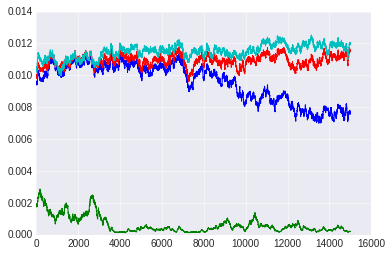

In [129]:
plt.plot(np.std(hs0, axis=1))
plt.plot(np.std(hs1, axis=1))
plt.plot(np.std(hs2, axis=1))
plt.plot(np.std(hs3, axis=1))

### xs - Current state, Synaptic gating

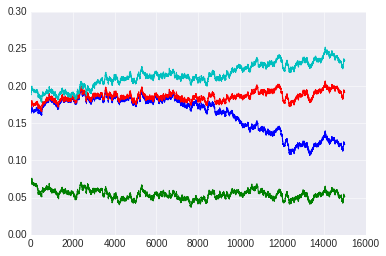

In [131]:
plt.plot(np.mean(xs0, axis=1))
plt.plot(np.mean(xs1, axis=1))
plt.plot(np.mean(xs2, axis=1))
plt.plot(np.mean(xs3, axis=1))

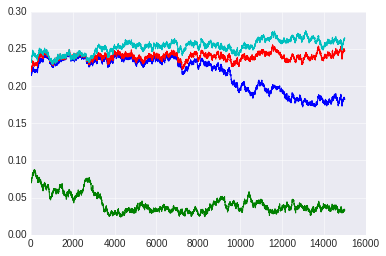

In [132]:
plt.plot(np.std(xs0, axis=1))
plt.plot(np.std(xs1, axis=1))
plt.plot(np.std(xs2, axis=1))
plt.plot(np.std(xs3, axis=1))

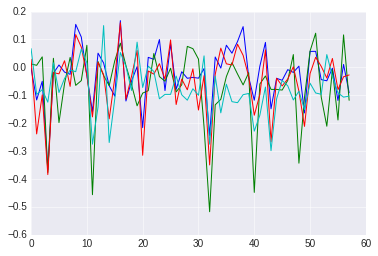

In [147]:
plt.plot(correlation0_hs)
plt.plot(correlation1_hs)
plt.plot(correlation2_hs)
plt.plot(correlation3_hs)

In [24]:
print('Model 0: %.06f' %np.mean(correlation0_hs))
print('Model 1: %.06f' %np.mean(correlation1_hs))
print('Model 2: %.06f' %np.mean(correlation2_hs))
print('Model 3: %.06f' %np.mean(correlation3_hs))

Model 0: -0.023656
Model 1: -0.069030
Model 2: -0.050139
Model 3: -0.077452


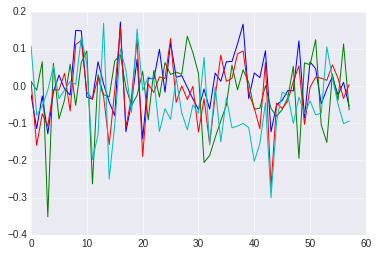

In [148]:
plt.plot(correlation0_xs)
plt.plot(correlation1_xs)
plt.plot(correlation2_xs)
plt.plot(correlation3_xs)

In [23]:
print('Model 0: %.06f' %np.mean(correlation0_xs))
print('Model 1: %.06f' %np.mean(correlation1_xs))
print('Model 2: %.06f' %np.mean(correlation2_xs))
print('Model 3: %.06f' %np.mean(correlation3_xs))

Model 0: 0.005283
Model 1: -0.018420
Model 2: -0.014949
Model 3: -0.046533


In [154]:
from collections import Counter
from pandas import Series
w0 =[round(i, 2) for i in tot_mindist0]
s0 = Series(Counter(w0))
w1 =[round(i, 2) for i in tot_mindist1]
s1 = Series(Counter(w1))
w2 =[round(i, 2) for i in tot_mindist2]
s2 = Series(Counter(w2))
w3 =[round(i, 2) for i in tot_mindist3]
s3 = Series(Counter(w3))

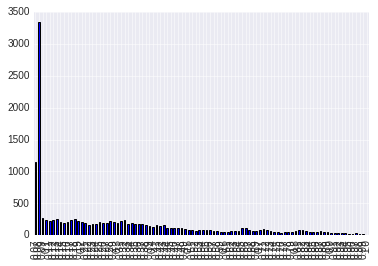

In [155]:
s0.plot(kind='bar')

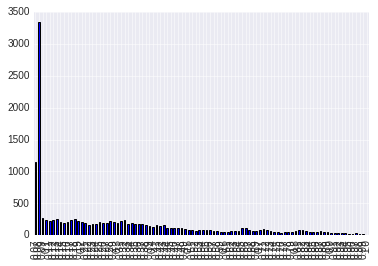

In [159]:
s1.plot(kind='bar')

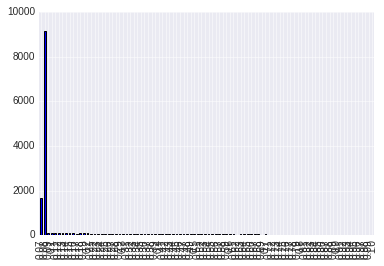

In [156]:
s2.plot(kind='bar')

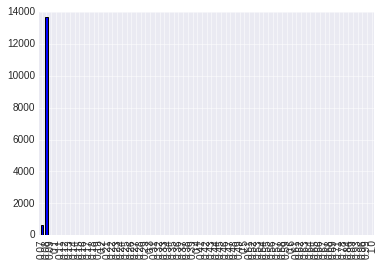

In [157]:
s3.plot(kind='bar')

In [160]:
s3

0.07      664
0.08    13712
0.09       40
0.10       40
0.11       22
0.12       19
0.13       23
0.14       23
0.15       17
0.16       17
0.17       19
0.18       13
0.19       19
0.20        9
0.21       26
0.22       10
0.23       10
0.24       14
0.25       17
0.26       14
0.27       13
0.28        8
0.29        8
0.30       10
0.31        9
0.32       13
0.33       13
0.34        5
0.35       11
0.36        9
        ...  
0.48        8
0.49        7
0.50        5
0.51        4
0.52        5
0.53        7
0.54        6
0.55        6
0.56        4
0.57        4
0.58        4
0.59        1
0.60        2
0.61        5
0.62        4
0.63        3
0.64        2
0.65        2
0.66        4
0.67        2
0.68        1
0.69        2
0.71        2
0.78        1
0.84        1
0.89        1
0.93        1
0.96        1
0.99        1
1.00        1
dtype: int64

## 3e06

### with DMN

In [25]:
path = '/home/jdafflon/code/Avatar/Python/Output/simulation/with_behaviour/behavioural_analysis/3e-06-withDMN'
ws0, hs0, xs0, tot_mindist0, correlation0_hs, mean_correlation0_hs, \
correlation0_xs, mean_correlation0_xs = get_behavioural_data(0, path, True)
ws1, hs1, xs1, tot_mindist1, correlation1_hs, mean_correlation1_hs, \
correlation1_xs, mean_correlation1_xs = get_behavioural_data(1, path, True)
ws2, hs2, xs2, tot_mindist2, correlation2_hs, mean_correlation2_hs, \
correlation2_xs, mean_correlation2_xs = get_behavioural_data(2, path, True)
ws3, hs3, xs3, tot_mindist3, correlation3_hs, mean_correlation3_hs, \
correlation3_xs, mean_correlation3_xs = get_behavioural_data(3, path, True)

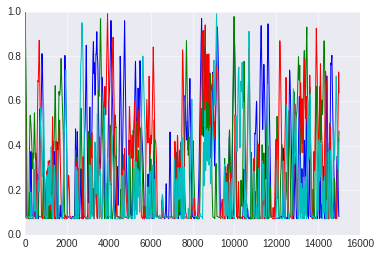

In [26]:
plt.plot(tot_mindist0)
plt.plot(tot_mindist1)
plt.plot(tot_mindist2)
plt.plot(tot_mindist3)

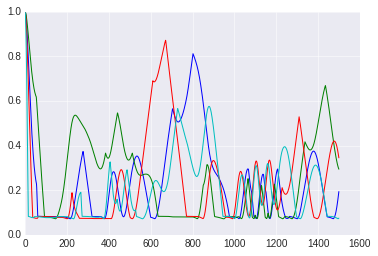

In [28]:
plt.plot(tot_mindist0[0:1500])
plt.plot(tot_mindist1[0:1500])
plt.plot(tot_mindist2[0:1500])
plt.plot(tot_mindist3[0:1500])

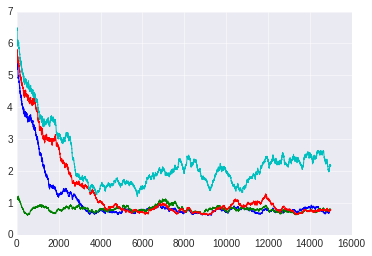

In [29]:
plt.plot(np.mean(hs0 * 1000, axis=1))
plt.plot(np.mean(hs1 * 1000, axis=1))
plt.plot(np.mean(hs2 * 1000, axis=1))
plt.plot(np.mean(hs3 * 1000, axis=1))

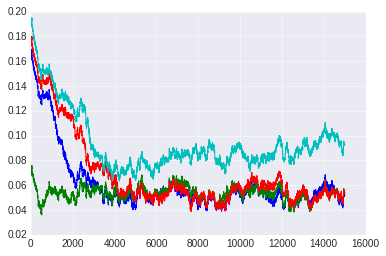

In [30]:
plt.plot(np.mean(xs0, axis=1))
plt.plot(np.mean(xs1, axis=1))
plt.plot(np.mean(xs2, axis=1))
plt.plot(np.mean(xs3, axis=1))

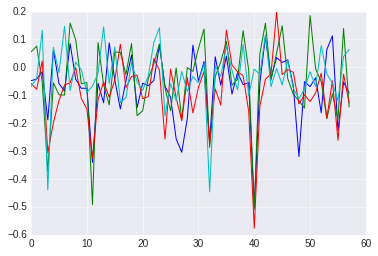

In [31]:
plt.plot(correlation0_hs)
plt.plot(correlation1_hs)
plt.plot(correlation2_hs)
plt.plot(correlation3_hs)

In [32]:
print('Model 0: %.06f' %np.mean(correlation0_hs))
print('Model 1: %.06f' %np.mean(correlation1_hs))
print('Model 2: %.06f' %np.mean(correlation2_hs))
print('Model 3: %.06f' %np.mean(correlation3_hs))

Model 0: -0.068928
Model 1: -0.041526
Model 2: -0.088557
Model 3: -0.032396


In [37]:
print(np.where(correlation0_hs < -.2))
print(np.where(correlation1_hs < -.2))
print(np.where(correlation2_hs < -.2))
print(np.where(correlation3_hs < -.2))

(array([11, 26, 27, 32, 40, 48, 55]),)
(array([ 3, 11, 32, 40]),)
(array([ 3, 11, 24, 32, 40, 55]),)
(array([ 3, 32]),)


### without DMN

In [40]:
path = '/home/jdafflon/code/Avatar/Python/Output/simulation/with_behaviour/behavioural_analysis/3e-06-noDMN'
ws0, hs0, xs0, tot_mindist0, correlation0_hs, mean_correlation0_hs, \
correlation0_xs, mean_correlation0_xs = get_behavioural_data(0, path, True)
ws1, hs1, xs1, tot_mindist1, correlation1_hs, mean_correlation1_hs, \
correlation1_xs, mean_correlation1_xs = get_behavioural_data(1, path, True)
ws2, hs2, xs2, tot_mindist2, correlation2_hs, mean_correlation2_hs, \
correlation2_xs, mean_correlation2_xs = get_behavioural_data(2, path, True)
ws3, hs3, xs3, tot_mindist3, correlation3_hs, mean_correlation3_hs, \
correlation3_xs, mean_correlation3_xs = get_behavioural_data(3, path, True)

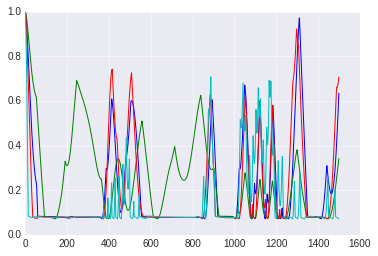

In [41]:
plt.plot(tot_mindist0[0:1500])
plt.plot(tot_mindist1[0:1500])
plt.plot(tot_mindist2[0:1500])
plt.plot(tot_mindist3[0:1500])

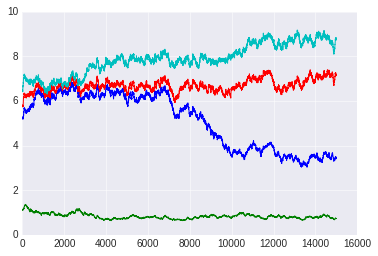

In [42]:
plt.plot(np.mean(hs0 * 1000, axis=1))
plt.plot(np.mean(hs1 * 1000, axis=1))
plt.plot(np.mean(hs2 * 1000, axis=1))
plt.plot(np.mean(hs3 * 1000, axis=1))

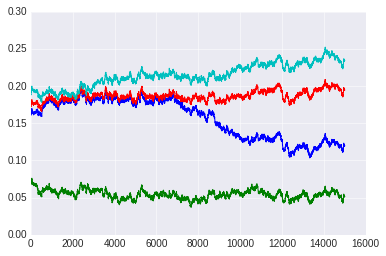

In [43]:
plt.plot(np.mean(xs0, axis=1))
plt.plot(np.mean(xs1, axis=1))
plt.plot(np.mean(xs2, axis=1))
plt.plot(np.mean(xs3, axis=1))

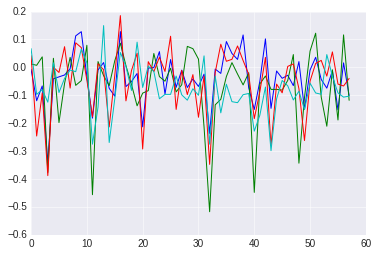

In [44]:
plt.plot(correlation0_hs)
plt.plot(correlation1_hs)
plt.plot(correlation2_hs)
plt.plot(correlation3_hs)

In [45]:
print('Model 0: %.06f' %np.mean(correlation0_hs))
print('Model 1: %.06f' %np.mean(correlation1_hs))
print('Model 2: %.06f' %np.mean(correlation2_hs))
print('Model 3: %.06f' %np.mean(correlation3_hs))

Model 0: -0.038299
Model 1: -0.069030
Model 2: -0.048948
Model 3: -0.077452


In [5]:
path1 = '../tmp_bad1.mat'
path2 = '../tmp_bad2.mat'
path3 = '../tmp_good1.mat'
path4 = '../tmp_good2.mat'

In [6]:
ws0, hs0, xs0, tot_mindist0, correlation0_hs, mean_correlation0_hs, \
correlation0_xs, mean_correlation0_xs = get_behavioural_data(0, path1, True)
ws2, hs2, xs2, tot_mindist2, correlation2_hs, mean_correlation2_hs, \
correlation2_xs, mean_correlation2_xs = get_behavioural_data(0, path2, True)
ws0, hs3, xs3, tot_mindist3, correlation3_hs, mean_correlation3_hs, \
correlation3_xs, mean_correlation3_xs = get_behavioural_data(0, path3, True)
ws4, hs4, xs4, tot_mindist4, correlation4_hs, mean_correlation4_hs, \
correlation4_xs, mean_correlation4_xs = get_behavioural_data(0, path4, True)

IOError: [Errno 20] Not a directory: '../tmp_bad1.mat/results_testn_0.mat'